<h1>
<p style="color:black;text-align:center;"> 
    Forward kinematic <br>
    For three-axis manipulator
</p>
</h1>


In [1]:
import numpy as np
from matplotlib import pyplot as plt

<h2>
    <p style="color:black;"> 
        Point
    </p> 
</h2>

$
p = 
    \begin{pmatrix}
        x \\
        y
    \end{pmatrix}
$

<br>
<h2>
    <p style="color:black;"> 
        Rotation Matrix:
    </p> 
</h2>

$
R(\theta) = 
    \begin{pmatrix}
        cos(\theta) & -sin(\theta) \\
        sin(\theta) & cos(\theta)
    \end{pmatrix}
$

<br>
<h2>
    <p style="color:black;"> 
        Rotation Point:
    </p> 
</h2>
    
$
p' = 
R(\theta) \cdot p = 
    \begin{pmatrix}
        cos(\theta) & -sin(\theta) \\
        sin(\theta) & cos(\theta)
    \end{pmatrix}
\cdot
    \begin{pmatrix}
        x \\
        y
    \end{pmatrix}
=
    \begin{pmatrix}
        x \cdot cos(\theta) - y \cdot sin(\theta) \\
        x \cdot sin(\theta) + y \cdot cos(\theta)
    \end{pmatrix}
=
    \begin{pmatrix}
        x' \\
        y'
    \end{pmatrix}
$



In [2]:
def R(ang: float) -> np.array:
    return np.array([
        [np.cos(ang), -np.sin(ang)],
        [np.sin(ang), np.cos(ang)]
    ])

In [3]:
def H(ang: float, dx: int, dy: int) -> np.array:
    return np.array([
        [np.cos(ang), -np.sin(ang), dx],
        [np.sin(ang), np.cos(ang), dy],
        [0, 0, 1],
    ])

<h2>
    <p style="color:black;margin:0;padding:0;"> 
        Initial conditions
    </p> 
</h2>

In [4]:
a1 = np.pi / 6 # First angle rotation
a2 = -np.pi / 3 # Second angle rotation
a3 = -np.pi / 4 # Third angle rotation
l1 = 3 # first link length
l2 = 2 # second link length
O = np.array([0, 0]) # start point

<h2>
    <p style="color:black;margin:0;padding:0;"> 
        Homogeneous Transformation
    </p> 
</h2>

In [5]:
H1 = H(a1, 0, 0)
H2 = H(a2, l1, 0)
H3 = H(a3, l2, 0)

H12 = np.matmul(H1, H2)
H123 = np.matmul(H12, H3)

<h2>
    <p style="color:black;margin:0;padding:0;"> 
        Draw Solution
    </p> 
</h2>

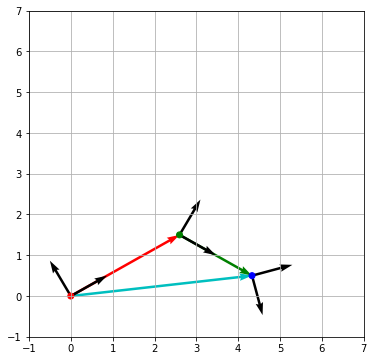

In [6]:
plt.figure(figsize=(6, 6))

plt.quiver(*O, *H123[:2, 2], color='c', scale_units='xy', angles='xy', scale=1) # FK solution

# Creating plot 
plt.quiver(*O, *(l1 * H1[:2,0]), color='r', scale_units='xy', angles='xy', scale=1) # first link
plt.quiver(*H12[:2, 2], *(l2 * H12[:2,0]), color='g', scale_units='xy', angles='xy', scale=1) # second link


plt.quiver(*np.array([O, O]).T, *H1[:2, :2], color='k', scale_units='xy', angles='xy', scale=1) # base frame
plt.quiver(*np.array([H12[:2, 2], H12[:2, 2]]).T, *H12[:2, :2], color='k', scale_units='xy', angles='xy', scale=1) # second frame
plt.quiver(*np.array([H123[:2, 2], H123[:2, 2]]).T, *H123[:2, :2], color='k', scale_units='xy', scale=1) # third frame

plt.scatter(*np.array([O, H12[:2, 2], H123[:2, 2]]).T, c=['r', 'g', 'b'])

# x-lim and y-lim
lim = [-1, 7]
plt.xlim(*lim) 
plt.ylim(*lim)
plt.grid() # grid on the plot

<h2>
    <p style="color:black;margin:0;padding:0;"> 
        Solution with variable initial conditions
    </p> 
</h2>

In [7]:
from ipywidgets import FloatSlider, interact

In [8]:
def solution(a1, a2, a3, l1, l2):
    plt.figure(figsize=(6, 6))

    # x-lim and y-lim
    lim = [-2, 6]
    plt.xlim(*lim) 
    plt.ylim(*lim)
    plt.grid() # grid on the plot

    
    O = np.array([0, 0]) # start point

    H1 = H(a1, 0, 0)
    H2 = H(a2, l1, 0)
    H3 = H(a3, l2, 0)

    H12 = np.matmul(H1, H2)
    H123 = np.matmul(H12, H3)


    # Draw solution
    plt.quiver(*O, *H123[:2, 2], color='c', scale_units='xy', angles='xy', scale=1) # FK solution

    # Creating plot 
    plt.quiver(*O, *(l1 * H1[:2,0]), color='r', scale_units='xy', angles='xy', scale=1) # first link
    plt.quiver(*H12[:2, 2], *(l2 * H12[:2,0]), color='g', scale_units='xy', angles='xy', scale=1) # second link


    plt.quiver(*np.array([O, O]).T, *H1[:2, :2], color='k', scale_units='xy', angles='xy', scale=1) # base frame
    plt.quiver(*np.array([H12[:2, 2], H12[:2, 2]]).T, *H12[:2, :2], color='k', scale_units='xy', angles='xy', scale=1) # second frame
    plt.quiver(*np.array([H123[:2, 2], H123[:2, 2]]).T, *H123[:2, :2], color='k', scale_units='xy', scale=1) # third frame

    plt.scatter(*np.array([O, H12[:2, 2], H123[:2, 2]]).T, c=['r', 'g', 'b'])



In [9]:
interact(
    solution, 
    a1=FloatSlider(min=-np.pi, max=np.pi, step=.1, value=0),
    a2=FloatSlider(min=-np.pi, max=np.pi, step=.1, value=0),
    a3=FloatSlider(min=-np.pi, max=np.pi, step=.1, value=0),
    l1=FloatSlider(min=1, max=5, step=.1, value=3),
    l2=FloatSlider(min=1, max=5, step=.1, value=2)
)

interactive(children=(FloatSlider(value=0.0, description='a1', max=3.141592653589793, min=-3.141592653589793),…

<function __main__.solution(a1, a2, a3, l1, l2)>